<a href="https://colab.research.google.com/github/Ayloko/Ayca/blob/main/carbon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving scopus (1).csv to scopus (1) (1).csv


In [ ]:
import pandas as pd
import numpy as np
import nltk
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
file_path = 'scopus (1).csv'
df = pd.read_csv(file_path)
df.head()
len(df)

79

In [ ]:
df.dropna(subset=['Author Keywords'], inplace=True)
df.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Cited by,DOI,Link,Abstract,Author Keywords,Document Type,Source
0,Morozan A.; Johnson H.; Roiron C.; Genay G.; A...,"Morozan, Adina (8370620900); Johnson, Hannah (...",8370620900; 57211552603; 57220864418; 57218992...,Nonprecious bimetallic iron−molybdenum sulfide...,2020,ACS Catalysis,50,10.1021/acscatal.0c03692,https://www.scopus.com/inward/record.uri?eid=2...,"In this study, we report the synthesis and cha...",Accelerated stress test; Carbon nanotubes; Hyd...,Article,Scopus
1,Xu J.; Li J.; Lian Z.; Araujo A.; Li Y.; Wei B...,"Xu, Junyuan (36573029700); Li, Junjie (5721905...",36573029700; 57219058597; 57195361377; 5720883...,Atomic-step enriched ruthenium−iridium nanocry...,2021,ACS Catalysis,77,10.1021/acscatal.0c04117,https://www.scopus.com/inward/record.uri?eid=2...,Achieving an efficient and stable oxygen evolu...,Atomic step; Electrocatalysis; Metal organic f...,Article,Scopus
2,Grigoriev S.; Fedotov A.; Nefedkin S.,"Grigoriev, Sergey (7005827347); Fedotov, Alexa...",7005827347; 57546471300; 6603139380,Synthesis and functionalization of electrocata...,2014,"20th World Hydrogen Energy Conference, WHEC 2014",0,NaN,https://www.scopus.com/inward/record.uri?eid=2...,Nanostructured electrocatalysts and catalytic ...,Bimetallic electrocatalysts; Carbon-supported ...,Conference paper,Scopus
3,Ehteshami S.M.M.; Zhou W.J.; Chan S.H.,"Ehteshami, Seyyed Mohsen Mousavi (55444037500)...",55444037500; 56003143300; 7404255421,Energy analysis of an electrolytic-based selec...,2013,International Journal of Hydrogen Energy,7,10.1016/j.ijhydene.2012.10.043,https://www.scopus.com/inward/record.uri?eid=2...,Carbon monoxide (CO) in the hydrogen (H2) stre...,Hydrogen; Polymer electrolyte membrane fuel ce...,Article,Scopus
4,Lee H.-O.; Yesuraj J.; Kim K.,"Lee, Hye-One (57210963343); Yesuraj, Johnbosco...",57210963343; 57200296786; 57209053700,Parametric study to optimize proton exchange m...,2022,Applied Energy,10,10.1016/j.apenergy.2022.118928,https://www.scopus.com/inward/record.uri?eid=2...,Proton exchange membrane electrolyzer cells (P...,Hydrogen; PEM electrolyzer cell; Transition me...,Article,Scopus


In [ ]:
remaining_data_count = len(df)
print("Remaining data:", remaining_data_count)

Remaining data: 60


In [ ]:
key_counts = df['Author Keywords'].value_counts()
print(key_counts)

Accelerated stress test; Carbon nanotubes; Hydrogen evolution reaction; Iron−molybdenum sulfide; Microwave irradiation; Proton exchange membrane electrolyzer                   1
Atomic step; Electrocatalysis; Metal organic framework support; Oxygen evolution reaction; RuIr nanocrystal                                                                     1
Electrocatalysis; Iridium; Oxygen evolution reaction; Proton exchange membrane electrolyzer; Water splitting                                                                    1
carbon nanotubes; hydrogen production; noncovalent functionalization; proton exchange membrane electrolyzer; water electrolysis                                                 1
Amorphous molybdenum sulfide; Electrocatalytic activity; Long term electrolysis; PEM; Tafel plot; Water splitting                                                               1
CCM swelling; PEM water electrolysis; X-Ray tomography                                                        

In [ ]:
nan_count = df['Author Keywords'].isna().sum()
nan_count

0

In [ ]:
from collections import Counter

In [ ]:
# Harf büyüklüğünü normalleştirme
df['Author Keywords'] = df['Author Keywords'].str.lower()

In [ ]:
  # Split the text by semicolons and extract multi-word keywords
  df['Keywords'] = df['Author Keywords'].str.split(';').apply(lambda x: [keyword.strip() for keyword in x])

  # Tüm anahtar kelimeleri içeren tek bir liste oluştur. İç içe iki döngü kullan:
  # Birinci döngü 'Keywords' sütunundaki her bir anahtar kelime listesini,
  # ikinci döngü ise her bir anahtar kelime listesindeki her bir kelimeyi alır.
  all_keywords = [keyword for keywords in df['Keywords'] for keyword in keywords]

  # Count the occurrences of all keywords
  keywords_counter = Counter(all_keywords)

  # Find the most common keyword
  most_common_keyword, count = keywords_counter.most_common(1)[0]
  print(f"The most common keyword is '{most_common_keyword}' with a count of {count}.")


The most common keyword is 'water electrolysis' with a count of 9.


In [ ]:
# Define the keywords you want to change and their replacements REPLACEMENT
keywords = all_keywords
keywords_to_change = {'iro<sub>2</sub>': 'iridium oxide',
                      'iro <sub>2</sub> catalyst' : 'iridium oxide catalyst',

                      'ruo<sub>2</sub>': 'ruthenium oxide',

                      'water electrolysis' : 'water splitting',

                      'pem electrolyser' : 'PEM',
                      'pem electrolyzer' : 'PEM',
                      'pem electrolyzers': 'PEM',
                      'pem water electrolyzers': 'PEM',
                      'pem water electrolyzer' : 'PEM',
                      'pem water electrolyser' : 'PEM',
                      'pem water electrolysis': 'PEM',
                      'proton exchange membrane electrolyzer': 'PEM',
                      'proton exchange membrane': 'PEM',
                      'proton-exchange membrane' : 'PEM',
                      'pem electrolysis': 'PEM',
                      'pem electrolysis cell': 'PEM',
                      'pem-electrolyzer' : 'PEM',
                      'proton exchange membrane water electrolysis': 'PEM',
                      'pem': 'PEM',
                      'pemec': 'PEM',
                      'pemwe': 'PEM',
                      'proton exchange membrane water electrolyzer': 'PEM',
                      'proton exchange membrane water electrolyzers': 'PEM',
                      'polymer electrolyte membrane': 'PEM',
                      'polymer electrolyte membrane water electrolyser' : 'PEM',
                      'polymer electrolyte membrane water electrolysis': 'PEM',
                      'polymer electrolyte membrane electrolyzer' : 'PEM',
                      'proton exchange membrane electrolyzer cell' : 'PEM',
                      'proton exchange membrane electrolyzer cells' : 'PEM',
                      'proton exchange membrane electrolysis cell' : 'PEM',
                      'pem electrolyzer cell' : 'PEM',
                      'proton exchange membrane water electrolysis (pemwe)' :'PEM',
                      'proton exchange membrane (pem) water electrolysis' : 'PEM',
                      'proton exchange membrane (pem)' : 'PEM',

                      'her' : 'hydrogen evolution reaction',
                      'hydrogen evolution reaction (her)' : 'hydrogen evolution reaction',
                      'hydrogen evolution reaction(her)' : 'hydrogen evolution reaction' ,

                      'oer' : 'oxygen evolution reaction',
                      'oxygen evolution reaction (oer)' : 'oxygen evolution reaction',
                      'oxygen evolution reaction(oer)' : 'oxygen evolution reaction',

                      }

# Iterate through the list and update specific keywords
for i, keyword in enumerate(keywords):
    if keyword in keywords_to_change:
        keywords[i] = keywords_to_change[keyword]


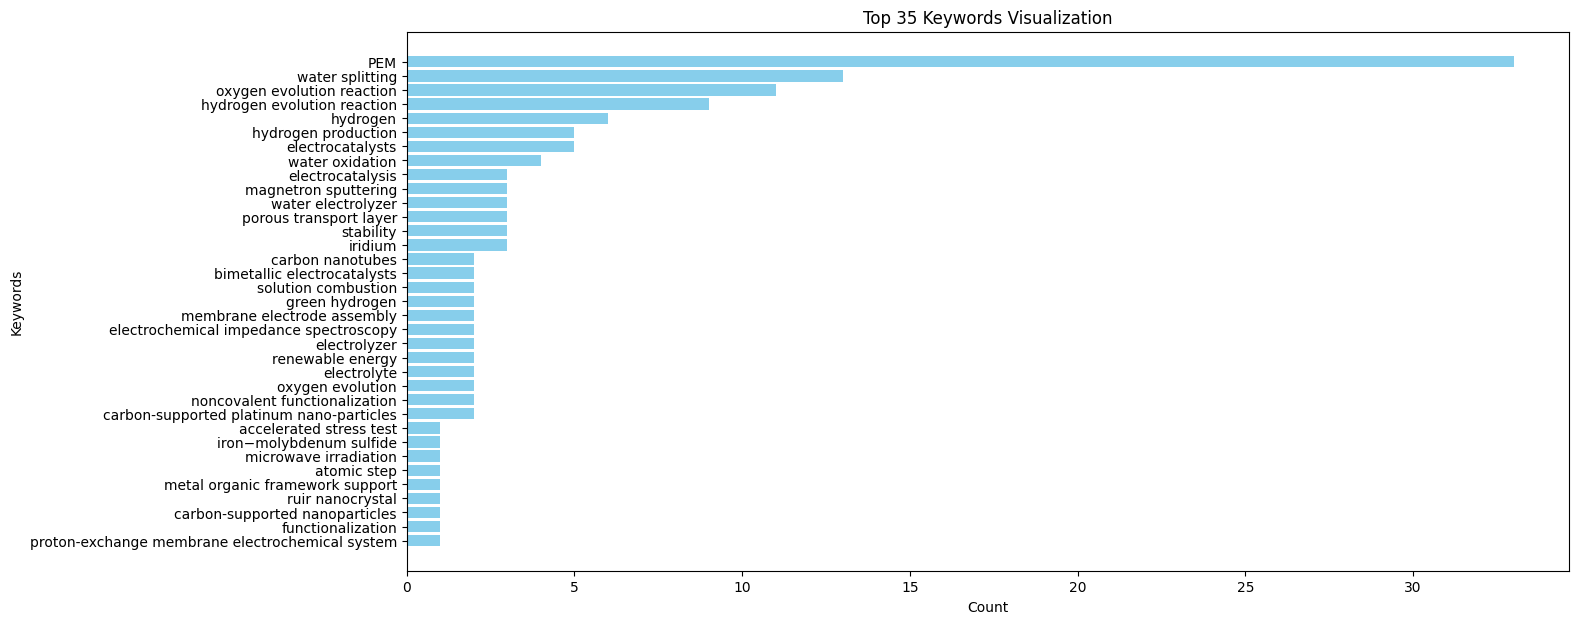

In [ ]:
# Sort the keywords by count in descending order
# key=lambda item: item[1] ifadesi, sıralamanın frekansa göre yapılacağını belirtir.
# item[1] ifadesi, her bir çiftin ikinci öğesine (frekans) karşılık gelir.
# Yani, sıralama, her çiftin frekansına göre gerçekleşir.
# reverse=True ifadesi ise, sıralamanın büyükten küçüğe olacağını belirtir.
# Yani, en yüksek frekansa sahip olan öğe ilk sırada olacak şekilde sıralama yapılır.

from collections import Counter
import matplotlib.pyplot as plt

mylist = keywords
keywords_counter = Counter(keywords)

keyword_counts = {}
for keyword in mylist:
    if keyword in keyword_counts:
        keyword_counts[keyword] += 1
    else:
        keyword_counts[keyword] = 1

sorted_keywords = sorted(keyword_counts.items(), key=lambda item: item[1], reverse=True)

# Extract the top 10 keywords and their respective counts
top_10_keywords = [item[0] for item in sorted_keywords[:35]]
top_10_counts = [item[1] for item in sorted_keywords[:35]]

# Create a bar chart for the top 30 keywords
plt.figure(figsize=(15, 7))
plt.barh(top_10_keywords, top_10_counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Keywords')
plt.title('Top 35 Keywords Visualization')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
top_10_keywords = keywords_counter.most_common(20)
print("The ten most common multi-word keywords are:")
for keyword, count in top_10_keywords:
    print(f"'{keyword}' with a count of {count}.")

The ten most common multi-word keywords are:
'PEM' with a count of 33.
'water splitting' with a count of 13.
'oxygen evolution reaction' with a count of 11.
'hydrogen evolution reaction' with a count of 9.
'hydrogen' with a count of 6.
'hydrogen production' with a count of 5.
'electrocatalysts' with a count of 5.
'water oxidation' with a count of 4.
'electrocatalysis' with a count of 3.
'magnetron sputtering' with a count of 3.
'water electrolyzer' with a count of 3.
'porous transport layer' with a count of 3.
'stability' with a count of 3.
'iridium' with a count of 3.
'carbon nanotubes' with a count of 2.
'bimetallic electrocatalysts' with a count of 2.
'solution combustion' with a count of 2.
'green hydrogen' with a count of 2.
'membrane electrode assembly' with a count of 2.
'electrochemical impedance spectroscopy' with a count of 2.


In [ ]:
df['Original Keywords'] = df['Author Keywords']

df['Author Keywords'] = df['Author Keywords'].str.lower()

df['Keywords'] = df['Author Keywords'].str.split(';').apply(lambda x: [keyword.strip() for keyword in x])

keywords_to_change = {'iro<sub>2</sub>': 'iridium oxide',
                       'iro <sub>2</sub> catalyst' : 'iridium oxide catalyst',

                      'ruo<sub>2</sub>': 'ruthenium oxide',

                      'pem electrolyser' : 'PEM',
                      'pem electrolyzer' : 'PEM',
                      'pem electrolyzers': 'PEM',
                      'pem water electrolyzers': 'PEM',
                      'pem water electrolyzer' : 'PEM',
                      'pem water electrolyser' : 'PEM',
                      'pem water electrolysis': 'PEM',
                      'proton exchange membrane electrolyzer': 'PEM',
                      'proton exchange membrane': 'PEM',
                      'proton-exchange membrane' : 'PEM',
                      'pem electrolysis': 'PEM',
                      'pem electrolysis cell': 'PEM',
                      'pem-electrolyzer' : 'PEM',
                      'proton exchange membrane water electrolysis': 'PEM',
                      'pem': 'PEM',
                      'pemec': 'PEM',
                      'pemwe': 'PEM',
                      'proton exchange membrane water electrolyzer': 'PEM',
                      'proton exchange membrane water electrolyzers': 'PEM',
                      'polymer electrolyte membrane': 'PEM',
                      'polymer electrolyte membrane water electrolyser' : 'PEM',
                      'polymer electrolyte membrane water electrolysis': 'PEM',
                      'polymer electrolyte membrane electrolyzer' : 'PEM',
                      'proton exchange membrane electrolyzer cell' : 'PEM',
                      'proton exchange membrane electrolyzer cells' : 'PEM',
                      'proton exchange membrane electrolysis cell' : 'PEM',
                      'pem electrolyzer cell' : 'PEM',
                      'proton exchange membrane water electrolysis (pemwe)' :'PEM',
                      'proton exchange membrane (pem) water electrolysis' : 'PEM',
                      'proton exchange membrane (pem)' : 'PEM',

                      'her' : 'hydrogen evolution reaction',
                      'hydrogen evolution reaction (her)' : 'hydrogen evolution reaction',
                      'hydrogen evolution reaction(her)' : 'hydrogen evolution reaction' ,

                      'oer' : 'oxygen evolution reaction',
                      'oxygen evolution reaction (oer)' : 'oxygen evolution reaction',
                      'oxygen evolution reaction(oer)' : 'oxygen evolution reaction',

                      }

def replace_keywords(keyword_list):
    return [keywords_to_change.get(keyword, keyword) for keyword in keyword_list]

df['Keywords'] = df['Keywords'].apply(replace_keywords)

df['Author Keywords'] = df['Keywords'].apply(lambda x: ';'.join(x))

# Now, 'Author Keywords' column contains the updated keywords with synonyms
# You can continue with the rest of your analysis using this updated DataFrame

# Iterate through the list and update specific keywords
#for i, keyword in enumerate(keywords):
#    if keyword in keywords_to_change:
 #       keywords[i] = keywords_to_change[keyword]


# Replace the 'Author Keywords' column with the updated keywords
#df['Author Keywords'] = ';'.join(keywords)


In [ ]:
df.head(5)

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Cited by,DOI,Link,Abstract,Author Keywords,Document Type,Source,Keywords,Original Keywords
0,Morozan A.; Johnson H.; Roiron C.; Genay G.; A...,"Morozan, Adina (8370620900); Johnson, Hannah (...",8370620900; 57211552603; 57220864418; 57218992...,Nonprecious bimetallic iron−molybdenum sulfide...,2020,ACS Catalysis,50,10.1021/acscatal.0c03692,https://www.scopus.com/inward/record.uri?eid=2...,"In this study, we report the synthesis and cha...",accelerated stress test;carbon nanotubes;hydro...,Article,Scopus,"[accelerated stress test, carbon nanotubes, hy...",accelerated stress test; carbon nanotubes; hyd...
1,Xu J.; Li J.; Lian Z.; Araujo A.; Li Y.; Wei B...,"Xu, Junyuan (36573029700); Li, Junjie (5721905...",36573029700; 57219058597; 57195361377; 5720883...,Atomic-step enriched ruthenium−iridium nanocry...,2021,ACS Catalysis,77,10.1021/acscatal.0c04117,https://www.scopus.com/inward/record.uri?eid=2...,Achieving an efficient and stable oxygen evolu...,atomic step;electrocatalysis;metal organic fra...,Article,Scopus,"[atomic step, electrocatalysis, metal organic ...",atomic step; electrocatalysis; metal organic f...
2,Grigoriev S.; Fedotov A.; Nefedkin S.,"Grigoriev, Sergey (7005827347); Fedotov, Alexa...",7005827347; 57546471300; 6603139380,Synthesis and functionalization of electrocata...,2014,"20th World Hydrogen Energy Conference, WHEC 2014",0,NaN,https://www.scopus.com/inward/record.uri?eid=2...,Nanostructured electrocatalysts and catalytic ...,bimetallic electrocatalysts;carbon-supported n...,Conference paper,Scopus,"[bimetallic electrocatalysts, carbon-supported...",bimetallic electrocatalysts; carbon-supported ...
3,Ehteshami S.M.M.; Zhou W.J.; Chan S.H.,"Ehteshami, Seyyed Mohsen Mousavi (55444037500)...",55444037500; 56003143300; 7404255421,Energy analysis of an electrolytic-based selec...,2013,International Journal of Hydrogen Energy,7,10.1016/j.ijhydene.2012.10.043,https://www.scopus.com/inward/record.uri?eid=2...,Carbon monoxide (CO) in the hydrogen (H2) stre...,hydrogen;polymer electrolyte membrane fuel cel...,Article,Scopus,"[hydrogen, polymer electrolyte membrane fuel c...",hydrogen; polymer electrolyte membrane fuel ce...
4,Lee H.-O.; Yesuraj J.; Kim K.,"Lee, Hye-One (57210963343); Yesuraj, Johnbosco...",57210963343; 57200296786; 57209053700,Parametric study to optimize proton exchange m...,2022,Applied Energy,10,10.1016/j.apenergy.2022.118928,https://www.scopus.com/inward/record.uri?eid=2...,Proton exchange membrane electrolyzer cells (P...,hydrogen;PEM;transition metal dichalcogenides;...,Article,Scopus,"[hydrogen, PEM, transition metal dichalcogenid...",hydrogen; pem electrolyzer cell; transition me...


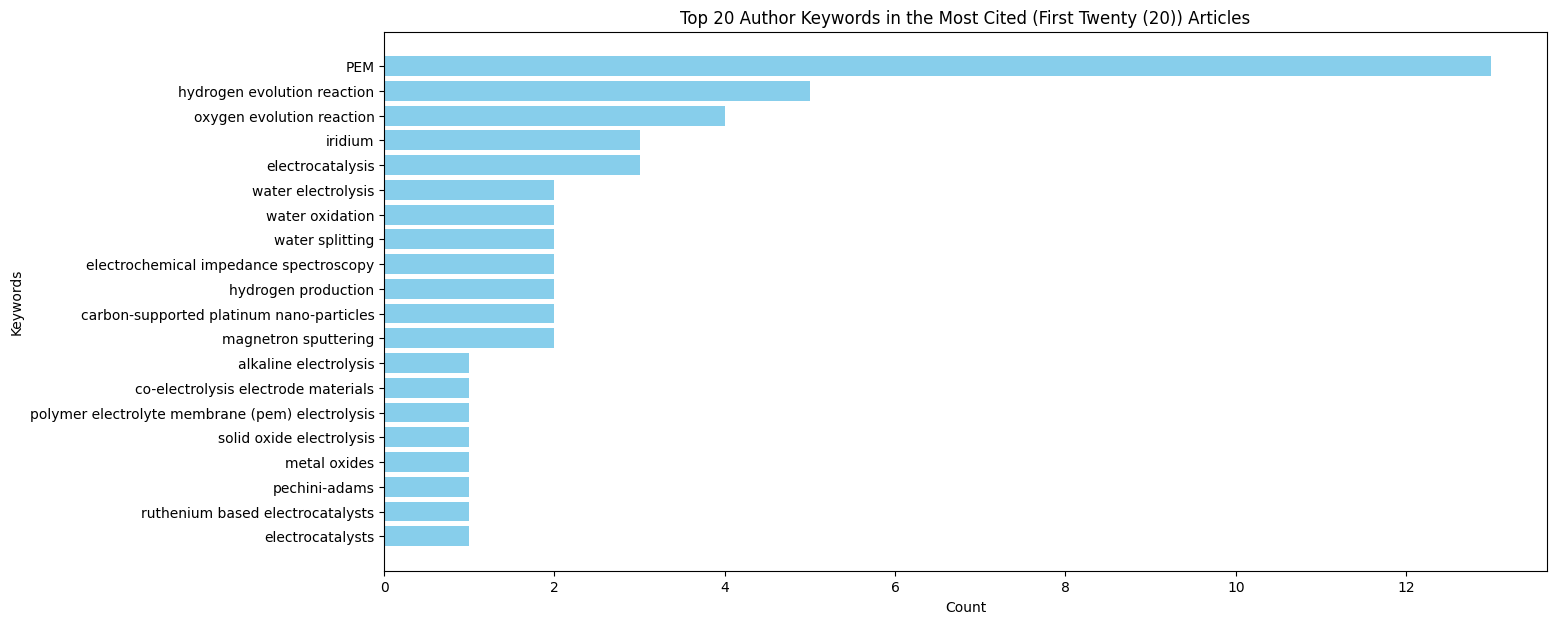

In [ ]:
df.dropna(subset=['Author Keywords'], inplace=True)

df['Author Keywords'] = df['Author Keywords'].str.lower()

top_cited_articles = df.sort_values(by='Cited by', ascending=False).head(20)

top_cited_articles['Keywords'] = top_cited_articles['Author Keywords'].str.split(';').apply(lambda x: [keyword.strip() for keyword in x])

all_keywords = [keyword for keywords in top_cited_articles['Keywords'] for keyword in keywords]

keywords = all_keywords
keywords_to_change = {'iro<sub>2</sub>': 'iridium oxide',

                      'ruo<sub>2</sub>': 'ruthenium oxide',

                      'pem electrolyser' : 'PEM',
                      'pem electrolyzer' : 'PEM',
                      'pem electrolyzers': 'PEM',
                      'pem water electrolyzers': 'PEM',
                      'pem water electrolyzer' : 'PEM',
                      'pem water electrolyser' : 'PEM',
                      'pem water electrolysis': 'PEM',
                      'proton exchange membrane electrolyzer': 'PEM',
                      'proton exchange membrane': 'PEM',
                      'proton-exchange membrane' : 'PEM',
                      'pem electrolysis': 'PEM',
                      'pem electrolysis cell': 'PEM',
                      'pem-electrolyzer' : 'PEM',
                      'proton exchange membrane water electrolysis': 'PEM',
                      'pem': 'PEM',
                      'pemec': 'PEM',
                      'pemwe': 'PEM',
                      'proton exchange membrane water electrolyzer': 'PEM',
                      'proton exchange membrane water electrolyzers': 'PEM',
                      'polymer electrolyte membrane': 'PEM',
                      'polymer electrolyte membrane water electrolyser' : 'PEM',
                      'polymer electrolyte membrane water electrolysis': 'PEM',
                      'polymer electrolyte membrane electrolyzer' : 'PEM',
                      'proton exchange membrane electrolyzer cell' : 'PEM',
                      'proton exchange membrane electrolyzer cells' : 'PEM',
                      'proton exchange membrane electrolysis cell' : 'PEM',
                      'pem electrolyzer cell' : 'PEM',
                      'proton exchange membrane water electrolysis (pemwe)' :'PEM',
                      'proton exchange membrane (pem) water electrolysis' : 'PEM',
                      'PEMWE': 'PEM',
                      'proton exchange membrane (pem)' : 'PEM',

                      'her' : 'hydrogen evolution reaction',
                      'hydrogen evolution reaction (her)' : 'hydrogen evolution reaction',
                      'hydrogen evolution reaction(her)' : 'hydrogen evolution reaction' ,

                      'oer' : 'oxygen evolution reaction',
                      'oxygen evolution reaction (oer)' : 'oxygen evolution reaction',
                      'oxygen evolution reaction(oer)' : 'oxygen evolution reaction',

                      }

for i, keyword in enumerate(keywords):
    if keyword in keywords_to_change:
        keywords[i] = keywords_to_change[keyword]


from collections import Counter
import matplotlib.pyplot as plt

mylist = keywords
keywords_counter = Counter(mylist)

keyword_counts = {}
for keyword in mylist:
    if keyword in keyword_counts:
        keyword_counts[keyword] += 1
    else:
        keyword_counts[keyword] = 1

sorted_keywords = sorted(keyword_counts.items(), key=lambda item: item[1], reverse=True)

top_10_keywords = [item[0] for item in sorted_keywords[:20]]
top_10_counts = [item[1] for item in sorted_keywords[:20]]

plt.figure(figsize=(15, 7))
plt.barh(top_10_keywords, top_10_counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Keywords')
plt.title('Top 20 Author Keywords in the Most Cited (First Twenty (20)) Articles')
plt.gca().invert_yaxis()
plt.show()

yep
# New Section

In [ ]:

# Find article titles with count=1 for a specific keyword
keyword_of_interest = 'hydrogen economy'  # Replace with the keyword you're interested in
articles_with_count_1 = []

for index, row in top_cited_articles.iterrows():
    if keyword_of_interest in row['Keywords'] and row['Keywords'].count(keyword_of_interest) == 1:
        articles_with_count_1.append(row['Title'])

print(f"Article titles with {keyword_of_interest} count=1: {articles_with_count_1}")


Article titles with hydrogen economy count=1: []


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Abstract'])

# Apply Latent Dirichlet Allocation (LDA)
num_topics = 20  # You can adjust this based on your dataset
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda.fit(X)

# Assign topics to abstracts
topic_assignments = lda.transform(X)
df['Topic'] = topic_assignments.argmax(axis=1)

# Now you have assigned topics to each abstract

In [ ]:
object_counts = df['Topic'].value_counts()
object_counts

7     8
18    6
9     6
8     6
16    5
2     4
17    4
4     4
1     3
10    2
11    2
15    2
5     1
12    1
14    1
3     1
0     1
13    1
19    1
6     1
Name: Topic, dtype: int64

In [ ]:
df['Topic'].shape[0]

60

In [ ]:
topic_words_dict = {}
feature_names = vectorizer.get_feature_names_out()
topic_word_matrix = lda.components_

n_top_words = 4  # You can adjust this to get more or fewer top words

for topic_idx, topic in enumerate(topic_word_matrix):
    top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    topic_words_dict[topic_idx] = top_words

# Print the dictionary with topics and their top words
for topic, top_words in topic_words_dict.items():
    print(f"Topic {topic}:", ", ".join(top_words))

Topic 0: titanium, anode, ohmic, lgdl
Topic 1: ir, oer, ncs, mv
Topic 2: carbon, electrocatalysts, high, pem
Topic 3: pemwe, water, membrane, ccm
Topic 4: electrolyzer, pem, water, hydrogen
Topic 5: nickel, hollow, surface, carbon
Topic 6: mesh, pore, ptl, losses
Topic 7: catalysts, pem, production, hydrogen
Topic 8: water, high, metal, pem
Topic 9: hydrogen, pt, cnps, pem
Topic 10: materials, high, soec, energy
Topic 11: pt, water, electrolysis, metal
Topic 12: water, membranes, ionic, membrane
Topic 13: materials, carbon, black, tio2
Topic 14: sdc, comos4, mv, 100
Topic 15: gas, corrosion, layer, carbon
Topic 16: high, pt, hydrogen, catalyst
Topic 17: hydrogen, energy, pem, ir
Topic 18: water, evolution, catalytic, iridium
Topic 19: oer, stability, electrolyzer, pem


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Abstract'])

# Apply Latent Dirichlet Allocation (LDA)
num_topics = 15
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda.fit(X)

# Assign topics to abstracts
topic_assignments = lda.transform(X)
df['Topic'] = topic_assignments.argmax(axis=1)

# Group by year and topic and count the occurrences
topic_counts = df.groupby(['Year', 'Topic']).size().unstack(fill_value=0)

# Display the results
print(topic_counts)

Topic  0   1   2   3   4   6   7   8   9   10  11  12  13  14
Year                                                         
2009    0   0   0   0   1   0   0   0   0   0   0   0   0   0
2011    0   0   1   0   0   0   0   0   0   0   0   0   0   0
2012    0   0   1   0   0   0   0   0   0   0   0   0   0   0
2013    0   0   0   0   2   0   1   0   0   0   0   0   0   0
2014    0   0   2   0   0   0   0   0   0   0   0   1   0   0
2015    0   0   0   0   0   1   0   1   0   0   0   0   0   0
2016    0   0   0   0   1   0   0   0   0   0   0   0   0   0
2017    1   0   1   0   0   0   2   0   0   0   0   0   0   0
2018    0   1   1   0   1   1   0   0   0   0   0   0   0   0
2019    0   0   0   0   0   0   0   0   0   0   0   0   0   1
2020    0   0   0   1   1   0   6   0   2   0   0   0   0   0
2021    0   1   0   0   1   0   1   2   1   0   1   0   0   0
2022    0   0   0   0   1   0   1   0   1   1   0   1   0   0
2023    0   0   1   3   0   0   2   1   2   1   2   0   0   0
2024    

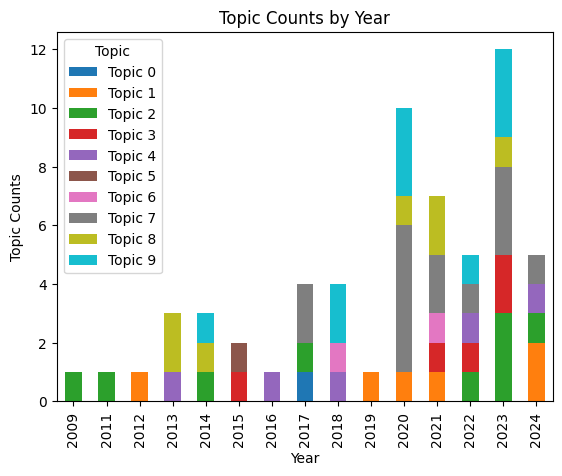

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Abstract'])

# Apply Latent Dirichlet Allocation (LDA)
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda.fit(X)

# Assign topics to abstracts
topic_assignments = lda.transform(X)
df['Topic'] = topic_assignments.argmax(axis=1)

# Group by year and topic and count the occurrences
topic_counts = df.groupby(['Year', 'Topic']).size().unstack(fill_value=0)

# Create a bar chart
topic_counts.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Topic Counts')
plt.title('Topic Counts by Year')
plt.legend(title='Topic', labels=[f'Topic {i}' for i in range(num_topics)])
plt.show()

In [ ]:
!pip install pandas nltk
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:

import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK data (if not already downloaded)
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Preprocess text
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

df['Cleaned_Abstract'] = df['Abstract'].apply(preprocess_text)

# Perform Sentiment Analysis
sia = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

df['Sentiment_Score'] = df['Cleaned_Abstract'].apply(get_sentiment_score)

# Categorize sentiment
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Sentiment_Score'].apply(categorize_sentiment)

# Save the updated DataFrame
df.to_csv('sentiment_analysis_results.csv', index=False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


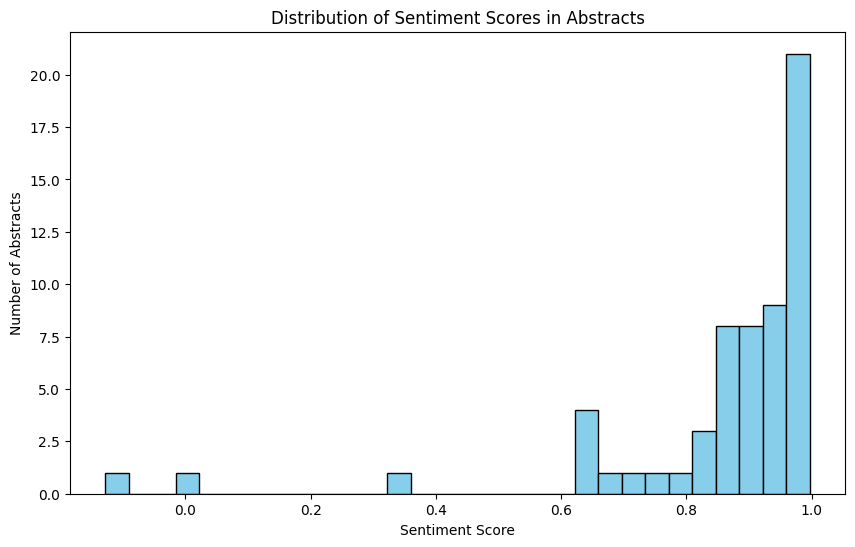

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(df['Sentiment_Score'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores in Abstracts')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Abstracts')
plt.show()

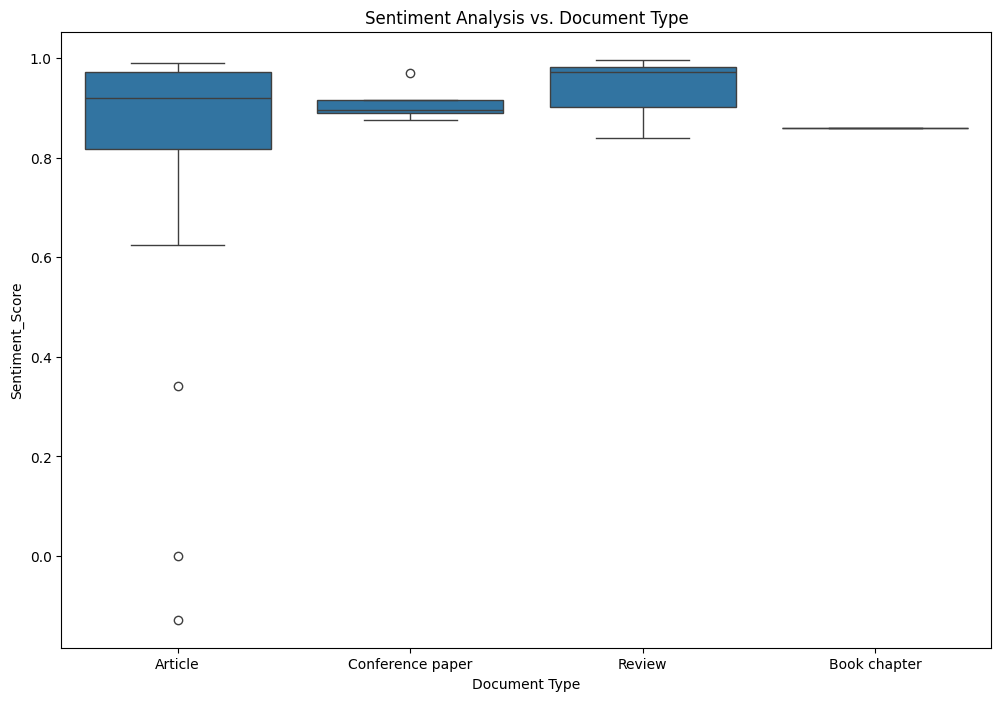

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='Document Type', y='Sentiment_Score', data=df)
plt.title('Sentiment Analysis vs. Document Type')
plt.show()

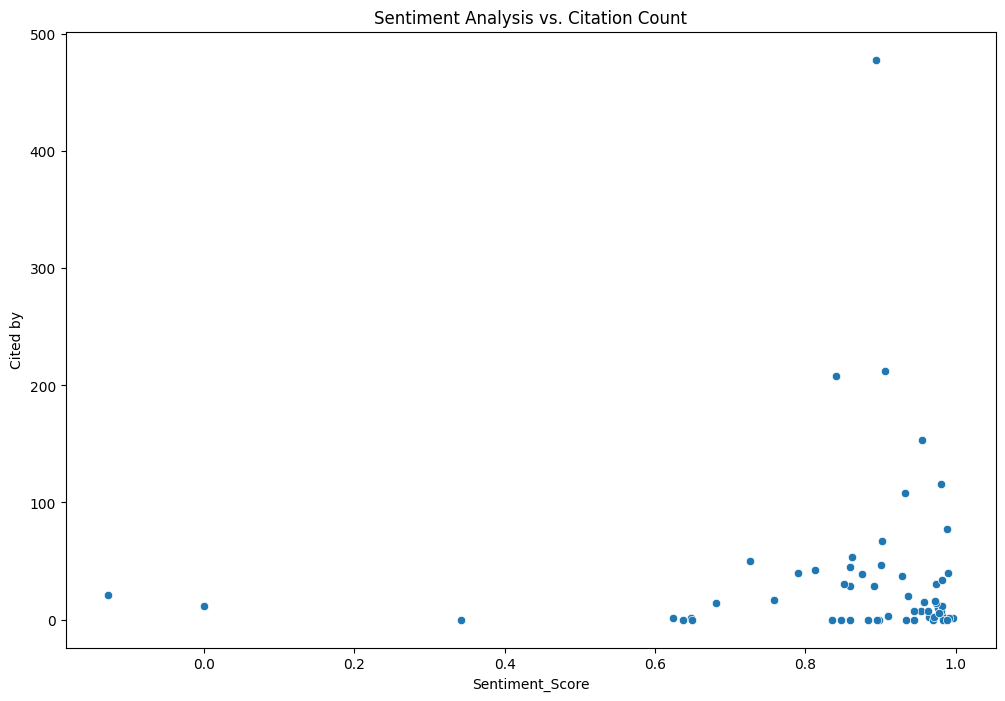

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Sentiment_Score', y='Cited by', data=df)
plt.title('Sentiment Analysis vs. Citation Count')
plt.show()

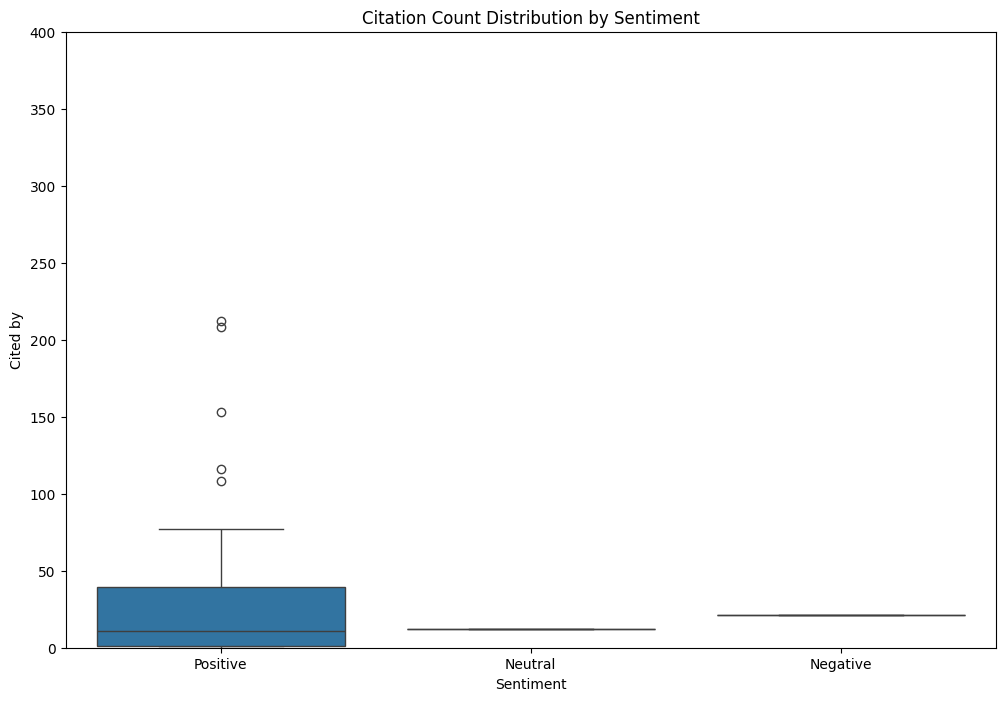

In [ ]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='Sentiment', y='Cited by', data=df)
plt.title('Citation Count Distribution by Sentiment')
plt.ylim(0, 400)  # Adjust the y-axis limits to the desired range
plt.show()


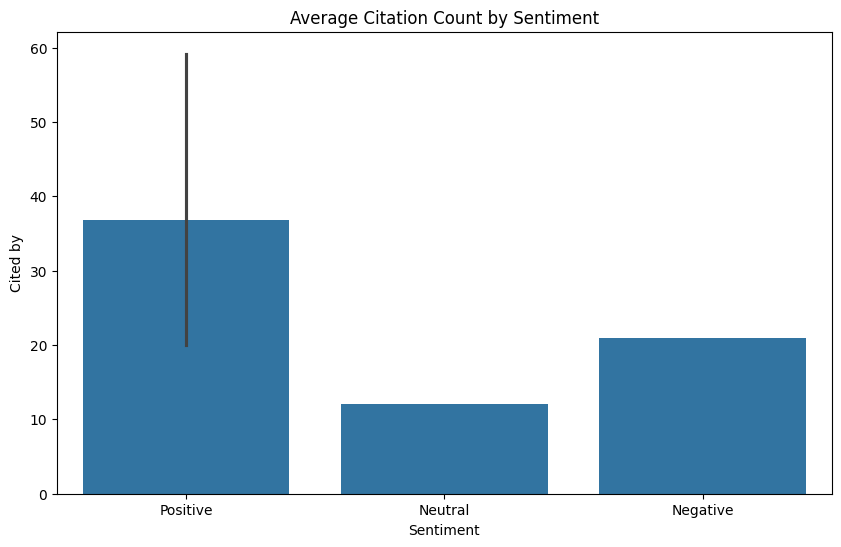

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sentiment', y='Cited by', data=df)
plt.title('Average Citation Count by Sentiment')
plt.show()


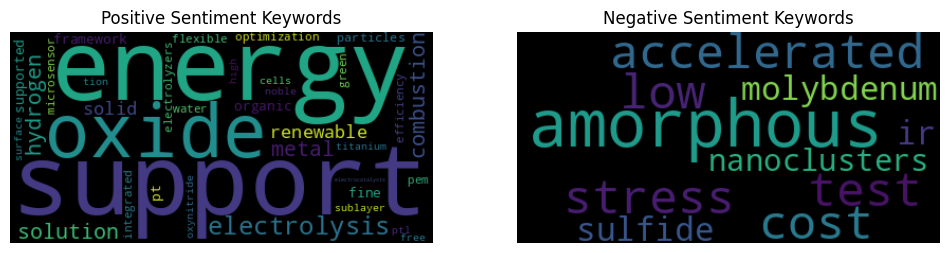

In [ ]:
# Harf büyüklüğünü normalleştirme
df['Author Keywords'] = df['Author Keywords'].str.lower()
# Split the text by semicolons and extract multi-word keywords
df['Keywords'] = df['Author Keywords'].str.split(';').apply(lambda x: [keyword.strip() for keyword in x])

  # Tüm anahtar kelimeleri içeren tek bir liste oluştur. İç içe iki döngü kullan:
  # Birinci döngü 'Keywords' sütunundaki her bir anahtar kelime listesini,
  # ikinci döngü ise her bir anahtar kelime listesindeki her bir kelimeyi alır.
all_keywords = [keyword for keywords in df['Keywords'] for keyword in keywords]

# Define the keywords you want to change and their replacements REPLACEMENT
keywords = all_keywords
keywords_to_change = {'iro<sub>2</sub>': 'iridium oxide',

                      'ruo<sub>2</sub>': 'ruthenium oxide',

                      'pem electrolyser' : 'PEM',
                      'pem electrolyzer' : 'PEM',
                      'pem electrolyzers': 'PEM',
                      'pem water electrolyzers': 'PEM',
                      'pem water electrolyzer' : 'PEM',
                      'pem water electrolyser' : 'PEM',
                      'pem water electrolysis': 'PEM',
                      'proton exchange membrane electrolyzer': 'PEM',
                      'proton exchange membrane': 'PEM',
                      'proton-exchange membrane' : 'PEM',
                      'pem electrolysis': 'PEM',
                      'pem electrolysis cell': 'PEM',
                      'pem-electrolyzer' : 'PEM',
                      'proton exchange membrane water electrolysis': 'PEM',
                      'pem': 'PEM',
                      'pemec': 'PEM',
                      'pemwe': 'PEM',
                      'proton exchange membrane water electrolyzer': 'PEM',
                      'proton exchange membrane water electrolyzers': 'PEM',
                      'polymer electrolyte membrane': 'PEM',
                      'polymer electrolyte membrane water electrolyser' : 'PEM',
                      'polymer electrolyte membrane water electrolysis': 'PEM',
                      'polymer electrolyte membrane electrolyzer' : 'PEM',
                      'proton exchange membrane electrolyzer cell' : 'PEM',
                      'proton exchange membrane electrolyzer cells' : 'PEM',
                      'proton exchange membrane electrolysis cell' : 'PEM',
                      'pem electrolyzer cell' : 'PEM',
                      'proton exchange membrane water electrolysis (pemwe)' :'PEM',
                      'proton exchange membrane (pem) water electrolysis' : 'PEM',
                      'proton exchange membrane (pem)' : 'PEM',

                      'her' : 'hydrogen evolution reaction',
                      'hydrogen evolution reaction (her)' : 'hydrogen evolution reaction',
                      'hydrogen evolution reaction(her)' : 'hydrogen evolution reaction' ,

                      'oer' : 'oxygen evolution reaction',
                      'oxygen evolution reaction (oer)' : 'oxygen evolution reaction',
                      'oxygen evolution reaction(oer)' : 'oxygen evolution reaction',

                      }

# Iterate through the list and update specific keywords
for i, keyword in enumerate(keywords):
    if keyword in keywords_to_change:
        keywords[i] = keywords_to_change[keyword]


from wordcloud import WordCloud

positive_keywords = [keyword for keyword in keywords if get_sentiment_score(keyword) >= 0.05]
negative_keywords = [keyword for keyword in keywords if get_sentiment_score(keyword) <= -0.05]

# Create word clouds for positive and negative sentiment keywords
wordcloud_positive = WordCloud().generate(' '.join(positive_keywords))
wordcloud_negative = WordCloud().generate(' '.join(negative_keywords))

# Display the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment Keywords')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment Keywords')
plt.axis("off")

plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# List of machine learning tools or algorithms
machine_learning_tools = [
    'linear regression', 'logistic regression', 'ridge regression', 'lasso regression',
    'decision tree', 'random forest', 'gradient boosting', 'XGBoost', 'AdaBoost',
    'support vector machine', 'k-nearest neighbors', 'k-means clustering',
    'principal component analysis', 'canonical correlation analysis', 't-distributed stochastic neighbor embedding',
    'neural network', 'deep learning', 'convolutional neural network', 'recurrent neural network',
    'natural language processing', 'NLP', 'word embedding', 'named entity recognition',
    'cluster analysis', 'hierarchical clustering', 'k-medoids',
    'association rule learning', 'Apriori algorithm', 'FP-growth',
    'reinforcement learning', 'Q-learning', 'deep Q network',
    'dimensionality reduction', 'singular value decomposition', 't-SNE'
]


# Combine title, keywords, and abstract into a single document for each article
df['Document'] = df['Title'] + ' ' + df['Author Keywords'] + ' ' + df['Abstract']

# CountVectorizer to analyze the frequency of machine learning tools
vectorizer = CountVectorizer(lowercase=True, vocabulary=machine_learning_tools)
X = vectorizer.fit_transform(df['Document'])

# Get the counts of each machine learning tool
tool_counts = pd.DataFrame(X.toarray(), columns=machine_learning_tools).sum()

# Check if all counts are zero before generating the word cloud
if tool_counts.sum() > 0:
    # Display the most common machine learning tools
    top_tools = tool_counts.sort_values(ascending=False).head(10)
    print(top_tools)

    # Visualize the results with a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_tools.to_dict())

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most Common Machine Learning Tools')
    plt.show()
else:
    print("No counts found for machine learning tools.")



No counts found for machine learning tools.


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


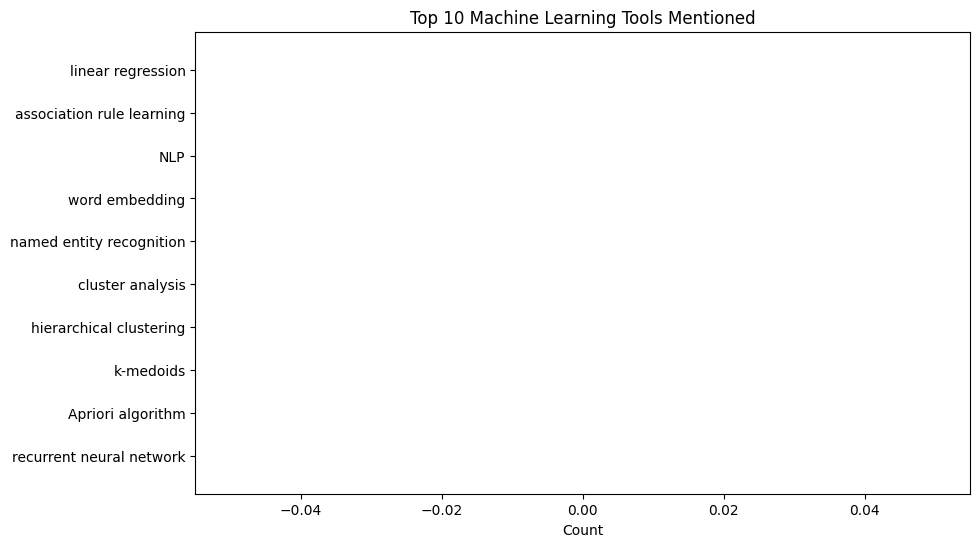

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Replace this line with your actual DataFrame loading code

machine_learning_tools = [
    'linear regression', 'logistic regression', 'ridge regression', 'lasso regression',
    'decision tree', 'random forest', 'gradient boosting', 'XGBoost', 'AdaBoost',
    'support vector machine', 'k-nearest neighbors', 'k-means clustering',
    'principal component analysis', 'canonical correlation analysis', 't-distributed stochastic neighbor embedding',
    'neural network', 'deep learning', 'convolutional neural network', 'recurrent neural network',
    'natural language processing', 'NLP', 'word embedding', 'named entity recognition',
    'cluster analysis', 'hierarchical clustering', 'k-medoids',
    'association rule learning', 'Apriori algorithm', 'FP-growth',
    'reinforcement learning', 'Q-learning', 'deep Q network',
    'dimensionality reduction', 'singular value decomposition', 't-SNE'
]

# Assuming df is your DataFrame
# Replace this line with your actual DataFrame loading code
# For example, df = pd.read_csv('your_file.csv')

# Combine the text columns into a single column for easy search
df['Combined_Text'] = df['Title'] + ' ' + df['Author Keywords'] + ' ' + df['Abstract']

# Initialize a dictionary to store the counts
tool_counts = {tool: 0 for tool in machine_learning_tools}

# Update the counts for each tool
for tool in machine_learning_tools:
    df[tool] = df['Combined_Text'].apply(lambda text: tool in text)
    tool_counts[tool] = df[tool].sum()

# Convert the dictionary to a DataFrame for better display
counts_df = pd.DataFrame(list(tool_counts.items()), columns=['Tool', 'Count'])

# Sort the DataFrame by Count in descending order
counts_df = counts_df.sort_values(by='Count', ascending=False)

# Select the top 10 tools
top_ten_tools = counts_df.head(10)

# Plot the top 10 tools and their counts in descending order
plt.figure(figsize=(10, 6))
plt.barh(top_ten_tools['Tool'], top_ten_tools['Count'], color='skyblue')
plt.xlabel('Count')
plt.title('Top 10 Machine Learning Tools Mentioned')
plt.gca().invert_yaxis()  # Invert y-axis to display in descending order
plt.show()

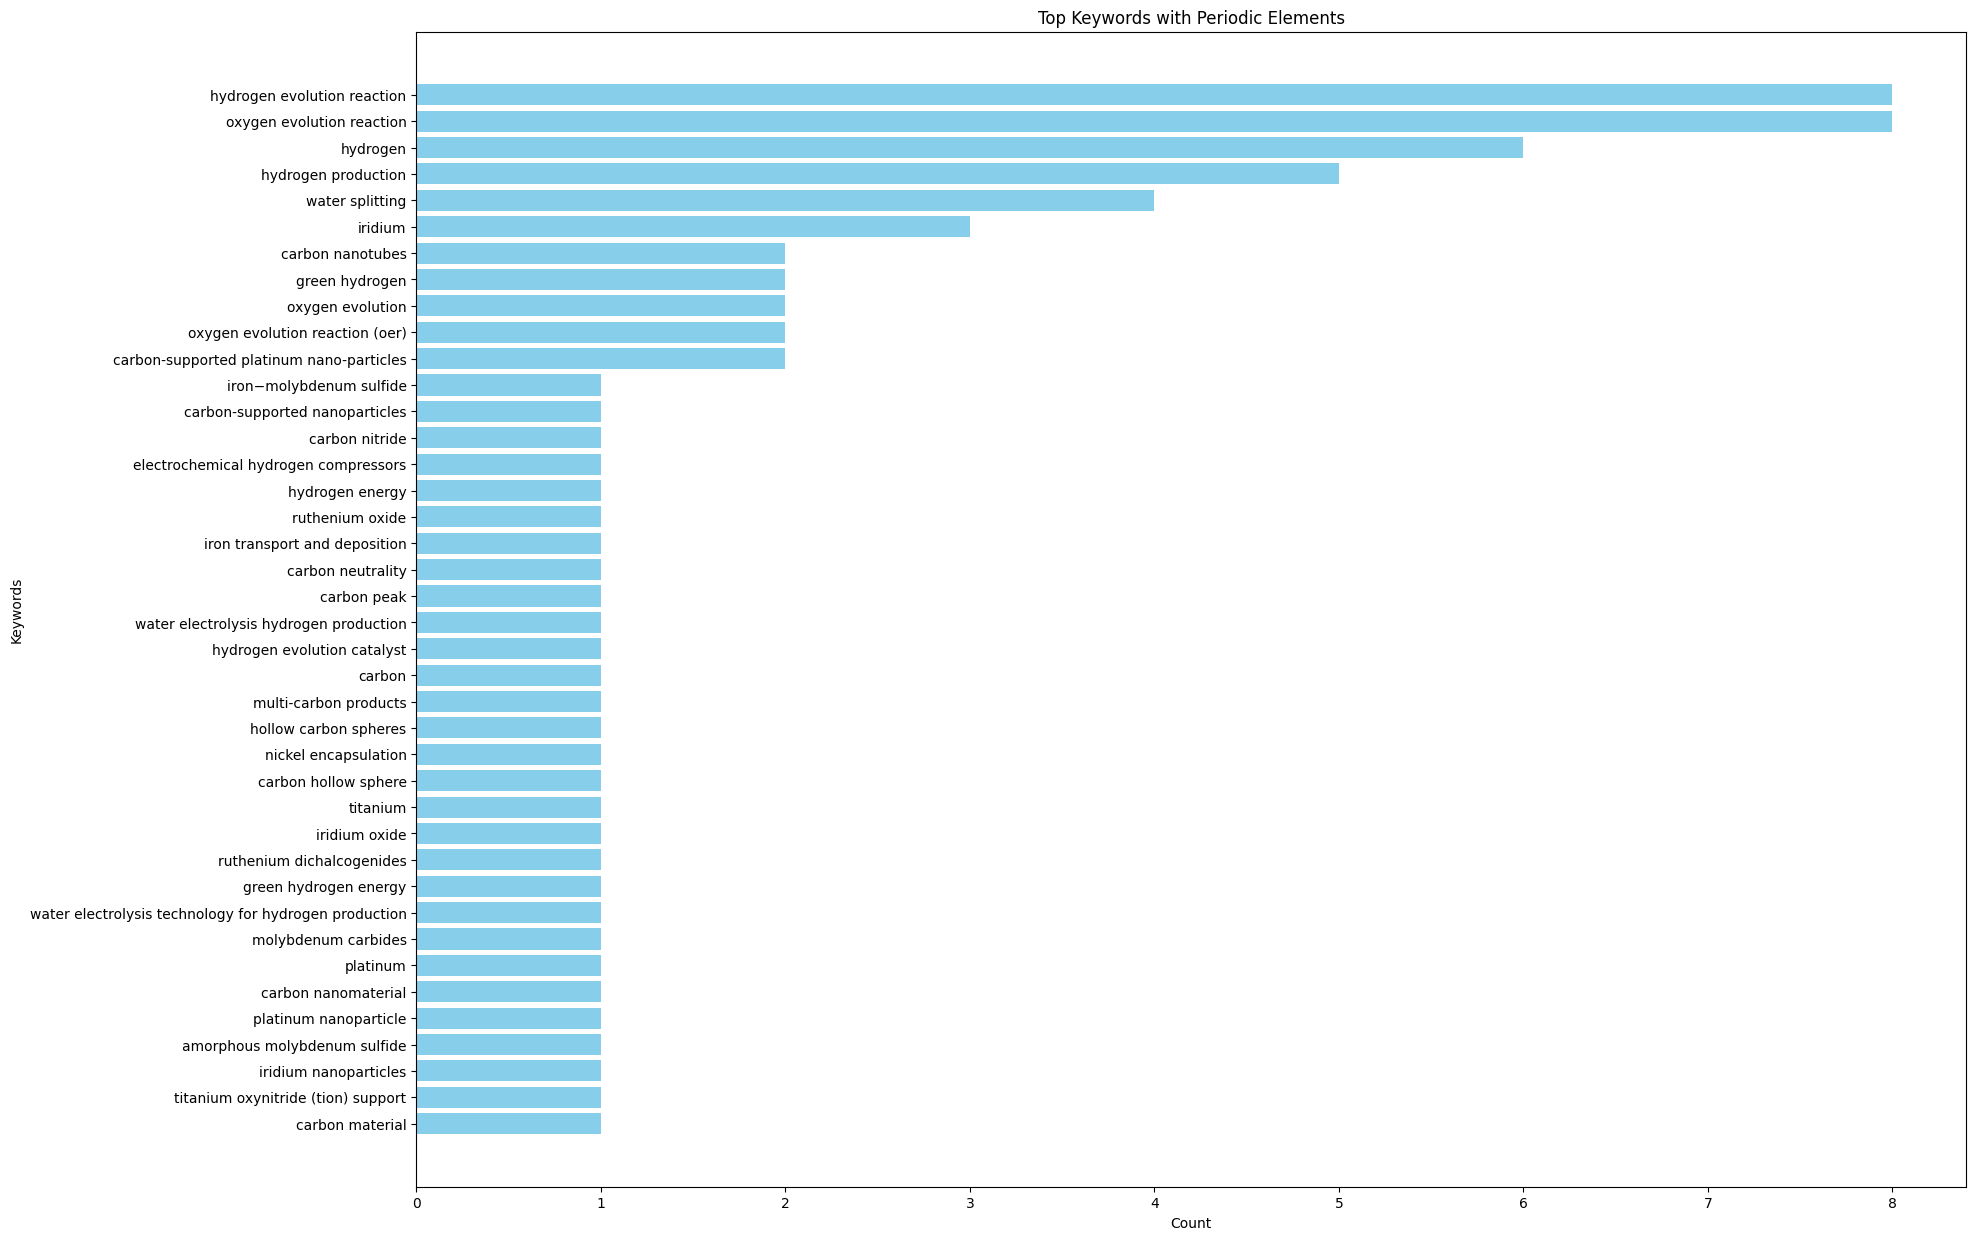

In [ ]:
df = pd.read_csv('scopus (1).csv')
df.dropna(subset=['Author Keywords'], inplace=True)
df['Author Keywords'] = df['Author Keywords'].str.lower()
# Split the text by semicolons and extract multi-word keywords
# Split the text by semicolons and extract multi-word keywords
df['Keywords'] = df['Author Keywords'].str.split(';').apply(lambda x: [keyword.strip() for keyword in x])

# Tüm anahtar kelimeleri içeren tek bir liste oluştur. İç içe iki döngü kullan:
# Birinci döngü 'Keywords' sütunundaki her bir anahtar kelime listesini,
# ikinci döngü ise her bir anahtar kelime listesindeki her bir kelimeyi alır.
all_keywords = [keyword for keywords in df['Keywords'] for keyword in keywords]
keywords = all_keywords


# Define the keywords you want to change and their replacements REPLACEMENT
keywords_to_change = {'iro<sub>2</sub>': 'iridium oxide','abajur':'osuruk'}

# Iterate through the list and update specific keywords
for i, keyword in enumerate(keywords):
    if keyword in keywords_to_change:
        keywords[i] = keywords_to_change[keyword]

periodic_elements = ['hydrogen', 'helium', 'lithium', 'beryllium', 'boron', 'carbon', 'nitrogen', 'oxygen', 'fluorine', 'neon', 'sodium', 'magnesium', 'aluminum', 'silicon', 'phosphorus', 'sulfur', 'chlorine', 'argon', 'potassium', 'calcium', 'scandium', 'titanium', 'vanadium', 'chromium', 'manganese', 'iron', 'cobalt', 'nickel', 'copper', 'zinc', 'gallium', 'germanium', 'arsenic', 'selenium', 'bromine', 'krypton', 'rubidium', 'strontium', 'yttrium', 'zirconium', 'niobium', 'molybdenum', 'technetium', 'ruthenium', 'rhodium', 'palladium', 'silver', 'cadmium', 'indium', 'tin', 'antimony', 'tellurium', 'iodine', 'xenon', 'cesium', 'barium', 'lanthanum', 'cerium', 'praseodymium', 'neodymium', 'promethium', 'samarium', 'europium', 'gadolinium', 'terbium', 'dysprosium', 'holmium', 'erbium', 'thulium', 'ytterbium', 'lutetium', 'hafnium', 'tantalum', 'tungsten', 'rhenium', 'osmium', 'iridium', 'platinum', 'gold', 'mercury', 'thallium', 'lead', 'bismuth', 'polonium', 'astatine', 'radon', 'francium', 'radium', 'actinium', 'thorium', 'protactinium', 'uranium', 'neptunium', 'plutonium', 'americium', 'curium', 'berkelium', 'californium', 'einsteinium', 'fermium', 'mendelevium', 'nobelium', 'lawrencium', 'rutherfordium', 'dubnium', 'seaborgium', 'bohrium', 'hassium', 'meitnerium', 'darmstadtium', 'roentgenium', 'copernicium', 'nihonium', 'flerovium', 'moscovium', 'livermorium', 'tennessine', 'oganesson']

# Your original list of keywords
# Create a list to store keywords containing periodic elements
keywords_with_periodic_elements = []

# Check each keyword for the presence of periodic elements
for keyword in keywords:
    for element in periodic_elements:
        if element in keyword.lower():
            keywords_with_periodic_elements.append(keyword)
            break  # Exit the inner loop if a match is found

mylist = keywords_with_periodic_elements

keyword_counts = {}
for keyword in mylist:
    if keyword in keyword_counts:
        keyword_counts[keyword] += 1
    else:
        keyword_counts[keyword] = 1

# Sort the keywords by count in descending order
sorted_keywords = sorted(keyword_counts.items(), key=lambda item: item[1], reverse=True)

# Extract the top 10 keywords and their respective counts
top_10_keywords = [item[0] for item in sorted_keywords[:40]]
top_10_counts = [item[1] for item in sorted_keywords[:40]]

# Create a bar chart for the top 10 keywords
plt.figure(figsize=(20, 15))
plt.barh(top_10_keywords, top_10_counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Keywords')
plt.title('Top Keywords with Periodic Elements')
plt.gca().invert_yaxis()
plt.show()

In [ ]:

from nltk import ngrams
import re


def generate_ngrams(text, n):

    words = re.findall(r'\w+', text.lower())

    ngram_list = list(ngrams(words, n))
    return ngram_list



with open('scopus (1).csv', 'r') as file:
    text = file.read()

n = 3
ngrams_generated = generate_ngrams(text, 2)
print(ngrams_generated)

[('authors', 'author'), ('author', 'full'), ('full', 'names'), ('names', 'author'), ('author', 's'), ('s', 'id'), ('id', 'title'), ('title', 'year'), ('year', 'source'), ('source', 'title'), ('title', 'cited'), ('cited', 'by'), ('by', 'doi'), ('doi', 'link'), ('link', 'abstract'), ('abstract', 'author'), ('author', 'keywords'), ('keywords', 'document'), ('document', 'type'), ('type', 'source'), ('source', 'morozan'), ('morozan', 'a'), ('a', 'johnson'), ('johnson', 'h'), ('h', 'roiron'), ('roiron', 'c'), ('c', 'genay'), ('genay', 'g'), ('g', 'aldakov'), ('aldakov', 'd'), ('d', 'ghedjatti'), ('ghedjatti', 'a'), ('a', 'nguyen'), ('nguyen', 'c'), ('c', 't'), ('t', 'tran'), ('tran', 'p'), ('p', 'd'), ('d', 'kinge'), ('kinge', 's'), ('s', 'artero'), ('artero', 'v'), ('v', 'morozan'), ('morozan', 'adina'), ('adina', '8370620900'), ('8370620900', 'johnson'), ('johnson', 'hannah'), ('hannah', '57211552603'), ('57211552603', 'roiron'), ('roiron', 'camille'), ('camille', '57220864418'), ('5722086

In [ ]:
#bigrams for the word "carbon"
from nltk import ngrams
import re

# Function to generate bigrams containing the word "carbon"
def generate_carbon_bigrams(text):
    # Remove punctuation and split text into words
    words = re.findall(r'\w+', text.lower())
    # Generate bigrams
    bigrams_list = list(ngrams(words, 7))
    # Filter bigrams containing the word "carbon"
    carbon_bigrams = [bigram for bigram in bigrams_list if 'membrane' in bigram]
    return carbon_bigrams

# Assuming 'text_file.txt' is the column name containing file paths
df = pd.DataFrame({'Abstract': ['scopus (1).csv', 'another_file.txt']})

# Example usage
# Access the first file path from the DataFrame
file_path = df['Abstract'].iloc[0]
text = pd.read_csv(file_path)
text=str(text)
carbon_bigrams_generated = generate_carbon_bigrams(text)
print(carbon_bigrams_generated)

[('hydrogen', 'h2', 'stre', 'hydrogen', 'polymer', 'electrolyte', 'membrane'), ('h2', 'stre', 'hydrogen', 'polymer', 'electrolyte', 'membrane', 'fuel'), ('stre', 'hydrogen', 'polymer', 'electrolyte', 'membrane', 'fuel', 'ce'), ('hydrogen', 'polymer', 'electrolyte', 'membrane', 'fuel', 'ce', 'article'), ('polymer', 'electrolyte', 'membrane', 'fuel', 'ce', 'article', 'scopus'), ('electrolyte', 'membrane', 'fuel', 'ce', 'article', 'scopus', '4'), ('membrane', 'fuel', 'ce', 'article', 'scopus', '4', 'lee'), ('record', 'uri', 'eid', '2', 'proton', 'exchange', 'membrane'), ('uri', 'eid', '2', 'proton', 'exchange', 'membrane', 'electrolyzer'), ('eid', '2', 'proton', 'exchange', 'membrane', 'electrolyzer', 'cells'), ('2', 'proton', 'exchange', 'membrane', 'electrolyzer', 'cells', 'p'), ('proton', 'exchange', 'membrane', 'electrolyzer', 'cells', 'p', 'hydrogen'), ('exchange', 'membrane', 'electrolyzer', 'cells', 'p', 'hydrogen', 'pem'), ('membrane', 'electrolyzer', 'cells', 'p', 'hydrogen', 'pe

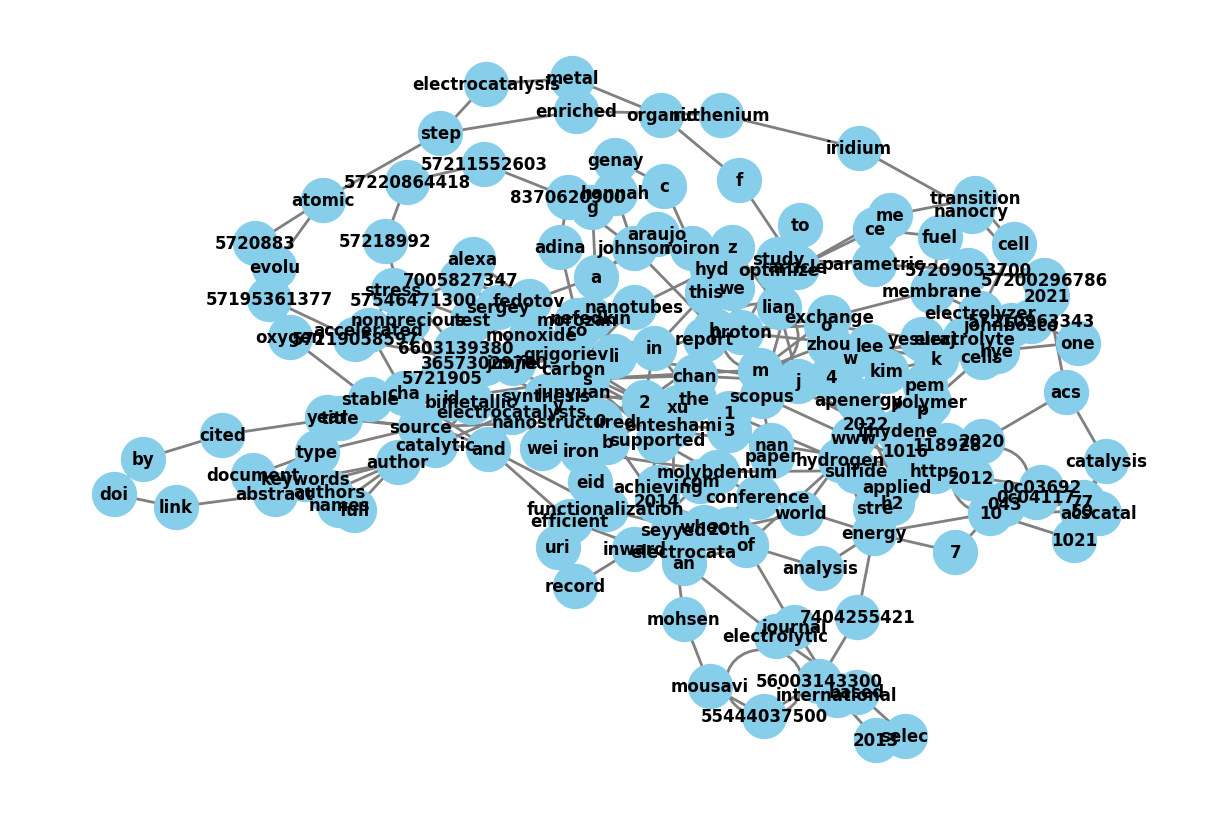

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from nltk import ngrams
import re

# Function to generate bigrams from text
def generate_bigrams(text):
    # Remove punctuation and split text into words
    words = re.findall(r'\w+', text.lower())
    # Generate bigrams
    bigram_list = list(ngrams(words, 2))
    return bigram_list
# Assuming 'text_file.txt' is the column name containing file paths
df = pd.DataFrame({'Abstract': ['scopus (1).csv', 'another_file.txt']})

# Example usage
# Access the first file path from the DataFrame
file_path = df['Abstract'].iloc[0]

text = pd.read_csv(file_path, nrows=5)
text=str(text)

# Generate bigrams from the text
bigrams_generated = generate_bigrams(text)

# Create a graph object
G = nx.Graph()

# Add edges to the graph based on bigrams
for bigram in bigrams_generated:
    word1, word2 = bigram
    G.add_edge(word1, word2)

# Set node positions using spring layout
pos = nx.spring_layout(G)

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_size=1000, node_color='skyblue', edge_color='gray', width=2)
plt.show()


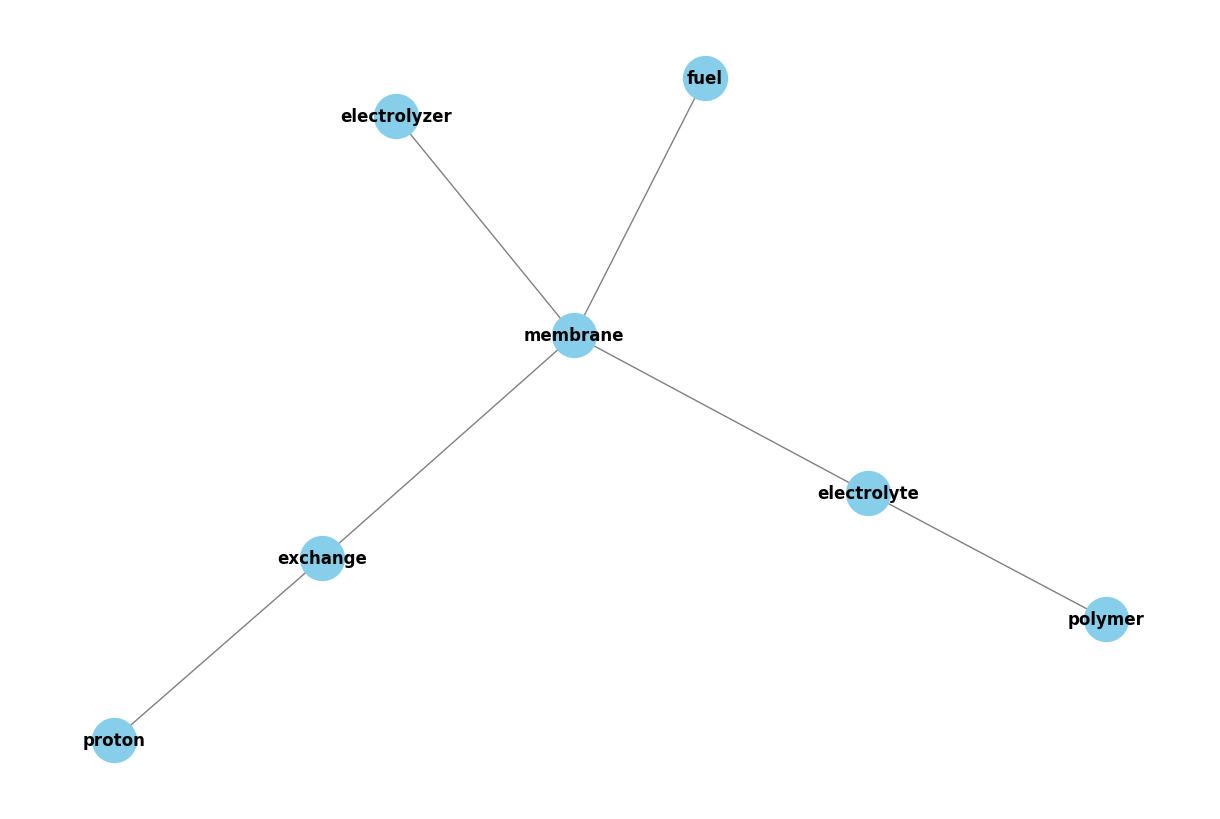

In [ ]:
file_path = 'scopus (1).csv'
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Example text data


# Specify the column index (starting from 0) of the column you want to read (10th column in this case)
column_index = 9  # Since indexing starts from 0, the 10th column has index 9
def generate_bigrams(text):
    # Remove punctuation and split text into words
    words = re.findall(r'\w+', text.lower())
    # Generate bigrams
    bigrams_list = list(ngrams(words, 3))
    carbon_bigrams = [bigram for bigram in bigrams_list if 'membrane' in bigram]
    return carbon_bigrams
# Read the CSV file and extract the specified column
column_data = pd.read_csv(file_path)
column_data=str(column_data)
words = word_tokenize(column_data)

# Load stopwords for English language
stop_words = set(stopwords.words('english'))

# Exclude stopwords from the words list
filtered_words = [word for word in words if word.lower() not in stop_words]

# Join the filtered words back into a sentence
filtered_text = ' '.join(filtered_words)
# Generate bigrams from the text
bigrams_generated = generate_bigrams(column_data)

# Create a graph object
G = nx.Graph()

# Add edges to the graph based on bigrams
for bigram in bigrams_generated:
    word1, word2,word3 = bigram
    G.add_edge(word1, word2)

# Set node positions using spring layout
pos = nx.spring_layout(G)

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_size=1000, node_color='skyblue', edge_color='gray', width=1)
plt.show()


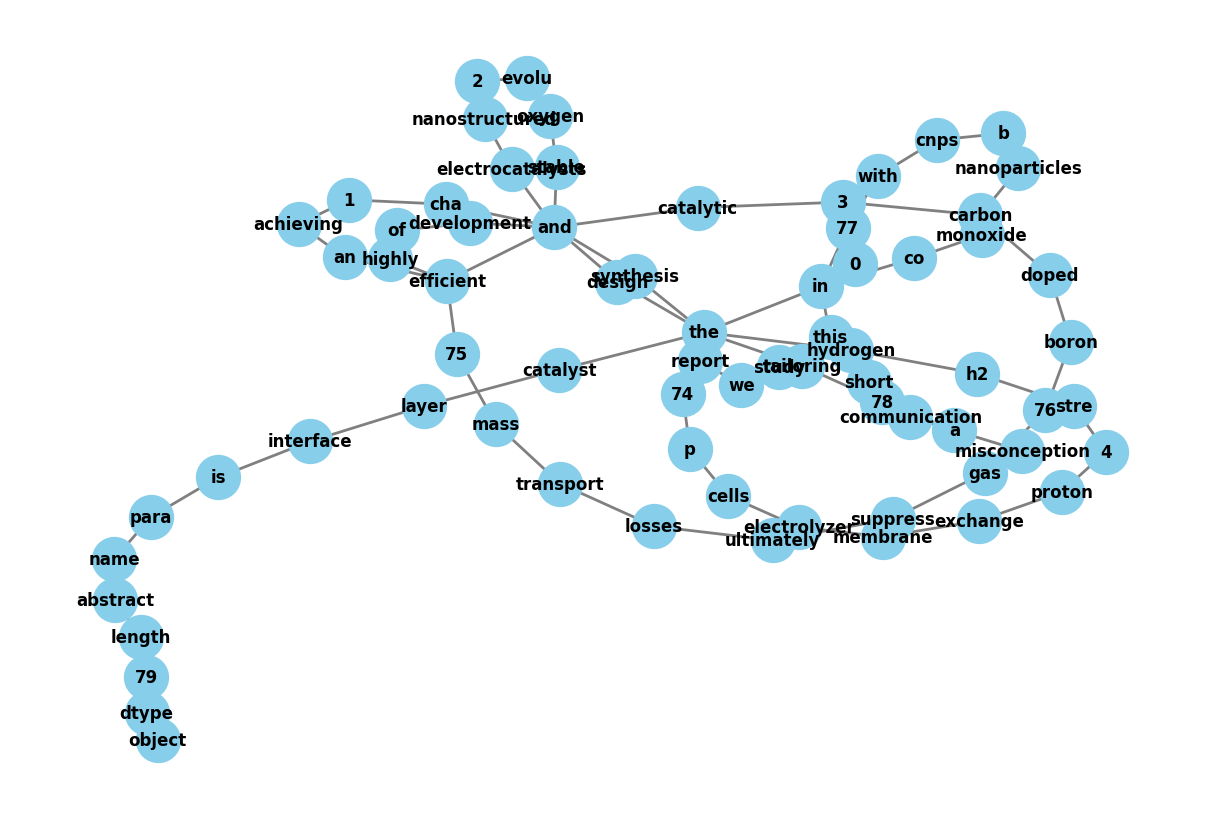

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from nltk import ngrams
import re
import pandas as pd

# Function to generate bigrams from text
def generate_bigrams(text):
    # Remove punctuation and split text into words
    words = re.findall(r'\w+', text.lower())
    # Generate bigrams
    bigram_list = list(ngrams(words, 2))
    return bigram_list

# Assuming 'text_file.txt' is the column name containing file paths
df = pd.DataFrame({'Abstract': ['scopus (1).csv', 'another_file.txt']})

# Example usage
# Access the first file path from the DataFrame
file_path = df['Abstract'].iloc[0]

# Read only the abstract column from the CSV file
abstract_column = pd.read_csv(file_path, usecols=['Abstract'])['Abstract']
# Tokenize the text into words
abstract_column=str(abstract_column)
words = word_tokenize(abstract_column)

# Load stopwords for English language
stop_words = set(stopwords.words('english'))

# Exclude stopwords from the words list
filtered_words = [word for word in words if word.lower() not in stop_words]

# Join the filtered words back into a sentence
filtered_text = ' '.join(filtered_words)


# Generate bigrams from the text
bigrams_generated = generate_bigrams(abstract_column)

# Create a graph object
G = nx.Graph()

# Add edges to the graph based on bigrams
for bigram in bigrams_generated:
    word1, word2 = bigram
    G.add_edge(word1, word2)

# Set node positions using spring layout
pos = nx.spring_layout(G)

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_size=1000, node_color='skyblue', edge_color='gray', width=2)
plt.show()